# Análisis de Datos Exploratorio
Se levantará el dataset guardado en el notebook de preparación de datos, para poder analizarlo.

In [1]:
import pandas as pd
import os
import json
import ast
import numpy as np
from pyprojroot import here
import sys
sys.path.append(here())
from utils.utils import normalizar_lineas_procesador, separar_valor_um
    

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt 


c:\Users\marti\miniconda3\envs\tesis\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
path = here() / "data"

In [5]:
file = input("Ingrese el nombre del archivo que desea leer: \n")

In [6]:
df = pd.read_csv(path / file, sep = ";")

## Preview del dataset

In [7]:
df.head(3)

,id,title,seller_id,price,base_price,deal_ids,initial_quantity,sold_quantity,listing_type_id,available_quantity,sold_quantity.1,sale_terms,condition,installment,display_size,shipping_cost,descriptions,attributes,warnings,status,date_created,shipping.mode,shipping.free_shipping,permalink,Tipo de batería,Marca,Cantidad de núcleos,Profundidad,Resolución de la pantalla,Tamaño de la pantalla,Tarjeta gráfica,Altura,Es 2 en 1,Es gamer,Es ultrabook,Condición del ítem,Línea,Modelo,Edición del sistema operativo,Nombre del sistema operativo,Versión del sistema operativo,Marca del procesador,Línea del procesador,Memoria RAM,Tipo de memoria RAM,Capacidad del SSD,Puertos USB,Cantidad total de puertos USB,Puertos de video,Peso,Ancho,Con Bluetooth,Con puerto ethernet,Con HDMI,Con salida para auriculares,Con lector de tarjeta de memoria,Con micrófono,Con pantalla táctil,Con USB,Con cámara web,Con Wi-Fi,Modos de sonido,Modelo del procesador,Tiempo de garantía,Tipo de garantía
0,MLA1157214207,"Notebook Exo Smart T33 Gris 14 , Intel Celeron...",180214913,63071.00000,63071.00000,"['MLA8258', 'MLA11620', 'MLA6015']",100,5,gold_pro,50,5,"[{'id': 'INVOICE', 'name': 'Facturación', 'val...",new,yes,hasta 14.1,free,[],"[{'id': 'ASPECT_RATIO', 'name': 'Relación de a...",[],active,2022-08-24T19:11:55.000Z,me2,True,https://articulo.mercadolibre.com.ar/MLA-11572...,Ion de litio,EXO,2.00000,216 mm,1366 px x 768 px,"14 """,Intel UHD Graphics 600,22.2 mm,No,No,No,Nuevo,Smart,T33,Home,Windows,11,Intel,Celeron,4 GB,DDR4,64 GB,"USB-A 2.0,USB-A 3.0",2.00000,Mini-HDMI,1350 g,327 mm,Sí,No,Sí,Sí,Sí,Sí,No,Sí,Sí,Sí,NaN,N4020,12 meses,Garantía de fábrica
1,MLA930347589,Notebook Lenovo Ideapad 14iil05 Platinum Gray...,86898163,129999.00000,129999.00000,['MLA6500'],210,200,gold_special,1,200,"[{'id': 'INVOICE', 'name': 'Facturación', 'val...",new,yes,hasta 14.1,free,[],"[{'id': 'GPU', 'name': 'GPU', 'value_id': '120...",[],active,2021-07-21T18:17:49.000Z,me2,True,https://articulo.mercadolibre.com.ar/MLA-93034...,Polímero de litio,Lenovo,4.00000,241 mm,1920 px x 1080 px,"14 """,Intel UHD Graphics G1,19.9 mm,No,Sí,Sí,Nuevo,IdeaPad,3,Home,Windows,10,Intel,Core i5,8 GB,DDR4,512 GB,"2.0,3.2",3.00000,HDMI,1.6 kg,327.1 mm,Sí,No,Sí,Sí,Sí,Sí,No,Sí,Sí,Sí,"Dolby Audio,Stereo",1035G1,12 meses,Garantía del vendedor
2,MLA1135443731,"Notebook Exo Smart L33e Gris 14 , Intel Celero...",25704919,59999.00000,59999.00000,"['MLA8258', 'MLA9166', 'MLA6015']",554,500,gold_special,1,500,"[{'id': 'WARRANTY_TIME', 'name': 'Tiempo de ga...",new,yes,hasta 14.1,free,[],"[{'id': 'ASPECT_RATIO', 'name': 'Relación de a...",[],active,2022-05-04T15:42:38.000Z,me2,True,https://articulo.mercadolibre.com.ar/MLA-11354...,NaN,EXO,2.00000,216 mm,1366 px x 768 px,"14 """,Intel UHD Graphics 600,22.2 mm,NaN,NaN,NaN,Nuevo,Smart,L33E,Home,Windows,10,Intel,Celeron,4 GB,DDR4,64 GB,"2.0,3.0",2.00000,Mini-HDMI,1350 g,327 mm,Sí,NaN,Sí,Sí,Sí,Sí,NaN,Sí,Sí,Sí,NaN,N4020,12 meses,Garantía de fábrica


In [8]:
df.shape

(11654, 65)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11654 entries, 0 to 11653
Data columns (total 65 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                11654 non-null  object 
 1   title                             11654 non-null  object 
 2   seller_id                         11654 non-null  int64  
 3   price                             11654 non-null  float64
 4   base_price                        11654 non-null  float64
 5   deal_ids                          11654 non-null  object 
 6   initial_quantity                  11654 non-null  int64  
 7   sold_quantity                     11654 non-null  int64  
 8   listing_type_id                   11654 non-null  object 
 9   available_quantity                11654 non-null  int64  
 10  sold_quantity.1                   11654 non-null  int64  
 11  sale_terms                        11654 non-null  object 
 12  cond

In [10]:
df.shape

(11654, 65)

## EDA
Haremos un analisis exploratorio con los siguientes campos para poder determinar cuales usar para las categorias:
- precio
- marca
- resolucion
- es gamer
- velocidad max del procesador
- marca
- linea del procesador
- memoria ram
- capacidad del ssd
- cuotas
- tamaño de la pantalla  
- costo de envío
- peso

### Precio

In [11]:
df.price.describe()

count     11654.00000
mean     207797.03384
std      125895.55419
min        4200.00000
25%      148999.00000
50%      190955.60000
75%      232599.00000
max     2701999.00000
Name: price, dtype: float64

In [12]:
df = df[df.price > 50000]

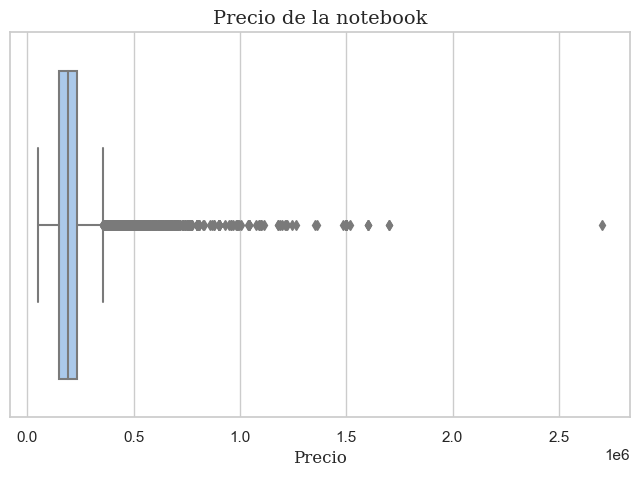

In [13]:
sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(8,5))
ax = sns.boxplot(x="price", data=df)
ax.set_title("Precio de la notebook", size=14, family='serif')  
plt.xlabel('Precio', size=12, family='serif')  
plt.show()

In [14]:
df[df.price > 2500000]

,id,title,seller_id,price,base_price,deal_ids,initial_quantity,sold_quantity,listing_type_id,available_quantity,sold_quantity.1,sale_terms,condition,installment,display_size,shipping_cost,descriptions,attributes,warnings,status,date_created,shipping.mode,shipping.free_shipping,permalink,Tipo de batería,Marca,Cantidad de núcleos,Profundidad,Resolución de la pantalla,Tamaño de la pantalla,Tarjeta gráfica,Altura,Es 2 en 1,Es gamer,Es ultrabook,Condición del ítem,Línea,Modelo,Edición del sistema operativo,Nombre del sistema operativo,Versión del sistema operativo,Marca del procesador,Línea del procesador,Memoria RAM,Tipo de memoria RAM,Capacidad del SSD,Puertos USB,Cantidad total de puertos USB,Puertos de video,Peso,Ancho,Con Bluetooth,Con puerto ethernet,Con HDMI,Con salida para auriculares,Con lector de tarjeta de memoria,Con micrófono,Con pantalla táctil,Con USB,Con cámara web,Con Wi-Fi,Modos de sonido,Modelo del procesador,Tiempo de garantía,Tipo de garantía
11531,MLA1123217115,Apple Macbook Pro 16 2021 M1 Pro Ssd4tb 32gb S...,245722648,2701999.00000,2701999.00000,[],1,0,gold_pro,1,0,"[{'id': 'WARRANTY_TYPE', 'name': 'Tipo de gara...",new,no_interest,entre 14.1 y 16.9,free,[],"[{'id': 'BATTERY_TYPE', 'name': 'Tipo de bater...",[],active,2022-02-11T19:25:21.000Z,me2,True,https://articulo.mercadolibre.com.ar/MLA-11232...,Polímero de litio,Apple,10.00000,24.81 cm,3456 px x 2234 px,"16.2 """,Apple GPU,NaN,No,No,NaN,Nuevo,MacBook Pro,"Macbook Pro 16""",NaN,macOS,Monterey,Apple,M1 Pro,32 GB,NaN,4 TB,NaN,NaN,NaN,2.15 kg,35.57 cm,NaN,NaN,Sí,NaN,NaN,NaN,No,Sí,NaN,NaN,NaN,NaN,6 meses,Garantía del vendedor


Tiene sentido esta computadora que es una MAC de alto nivel, por lo tanto no la eliminaremos del dataframe.

### Marca  
Como existen muchas marcas se procede a agrupar aquellas que aparezcan menos de 100 veces, bajo el nombre "Otros". Se entiende que las marcas más populares estan dentro de las que tienen mas de 100 y que no sería tan relevante dejar el nombre de una marca que aparece menos de 100 veces.

In [15]:
marcas = df.Marca.value_counts().to_frame()
marcas["condicion"] = marcas.index
marcas.loc[marcas["Marca"] < 100, "condicion"] = "Otro"
marcas = marcas.rename_axis('Marca_Original').reset_index()
marcas.columns = ["Marca_Original", "Cantidad", "Marca_Nueva"]
marcas.tail()

del marcas["Cantidad"]

In [16]:
df = df.merge(marcas,
         how = "left",
         left_on = "Marca",
         right_on = "Marca_Original")


In [17]:
del df["Marca_Original"], df["Marca"]
df.rename(columns = {"Marca_Nueva" : "Marca"}, inplace = True)

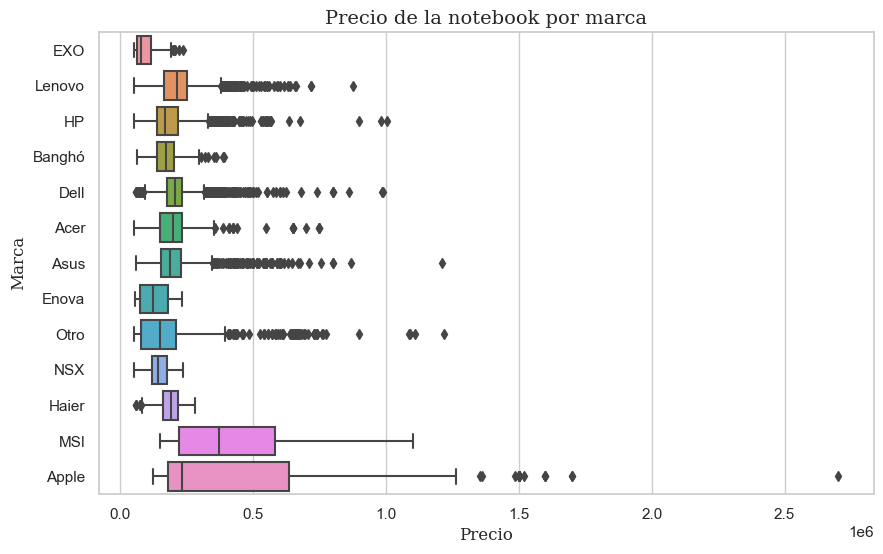

In [18]:
sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(10,6))
ax = sns.boxplot(x="price", data=df, y = "Marca")  
ax.set_title("Precio de la notebook por marca", size=14, family='serif') 
plt.ylabel('Marca', size=12, family='serif')  
plt.xlabel('Precio', size=12, family='serif')  
plt.show()

<Figure size 800x400 with 0 Axes>

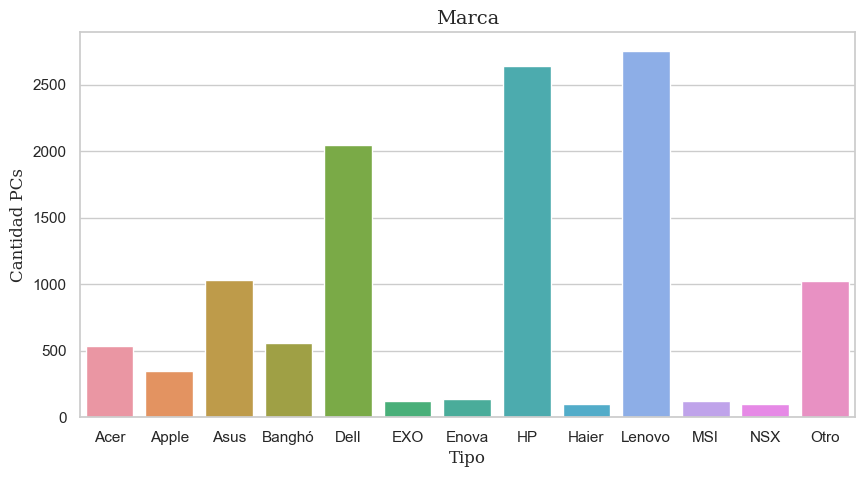

In [19]:
sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(8,4))

plt.figure(figsize=(10,5))
ax = sns.barplot(x="Marca", y = "total", data=df.groupby("Marca").size().reset_index(name="total"))
ax.set_title("Marca", size=14, family='serif') 
plt.xlabel("Tipo", size=12, family='serif')  
plt.ylabel("Cantidad PCs", size=12, family='serif')  
plt.show()

### Procesador

In [20]:
df = df.rename(columns= {"Línea del procesador" : "linea_procesador"})
df.linea_procesador.isna().sum()

1802

In [21]:
df = normalizar_lineas_procesador(df, "linea_procesador")
df.linea_procesador.isna().sum()

1802

In [22]:
df = df.rename(columns= {"Modelo del procesador" : "modelo_procesador"})
df.modelo_procesador.isna().sum()

7825

In [23]:
df = normalizar_lineas_procesador(df, "modelo_procesador")
df.modelo_procesador.isna().sum()

7825

In [24]:
cm1 = (df.modelo_procesador == "M1")
cotro = (df.linea_procesador == "Otro")

df.loc[cm1 & cotro, "linea_procesador"] = "M1"

In [25]:
df.linea_procesador.value_counts()

Core i5    2883
Core i3    1849
Core i7    1549
Ryzen 5    1035
Celeron     939
Ryzen 7     337
Otro        318
Ryzen 3     256
Athlon      218
Pentium     210
AMD A6       77
M1           54
Name: linea_procesador, dtype: int64

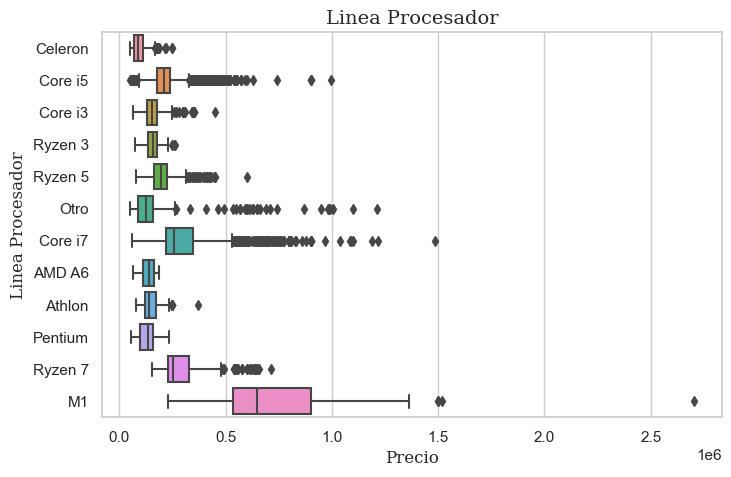

In [26]:
sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(8,5))
ax = sns.boxplot(x="price", data=df, y = "linea_procesador")
ax.set_title("Linea Procesador", size=14, family='serif') 
plt.ylabel('Linea Procesador', size=12, family='serif')  
plt.xlabel('Precio', size=12, family='serif')  
plt.show()

### RAM

In [27]:
df = separar_valor_um(df = df,
                    colname = "Memoria RAM", 
                    res_val = 'Capacidad RAM', 
                    res_um = 'Medida_RAM',
                    cambio = {"mb" : 1000,
                              "kb" : 1000000},
                    new_um = "GB")

<Figure size 800x400 with 0 Axes>

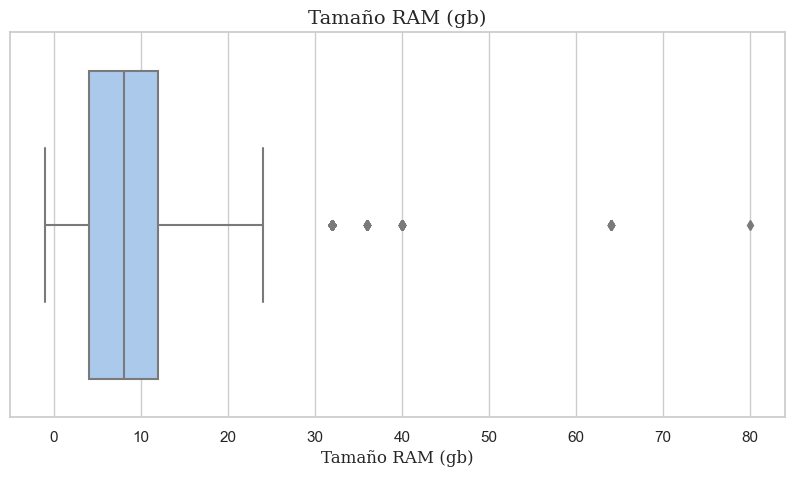

In [28]:
sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(8,4))

plt.figure(figsize=(10,5))
ax = sns.boxplot(x="Capacidad RAM", data=df)
ax.set_title("Tamaño RAM (gb)", size=14, family='serif') 
plt.xlabel('Tamaño RAM (gb)', size=12, family='serif')  
plt.show()

In [29]:
df = df[df["Capacidad RAM"] < 129]

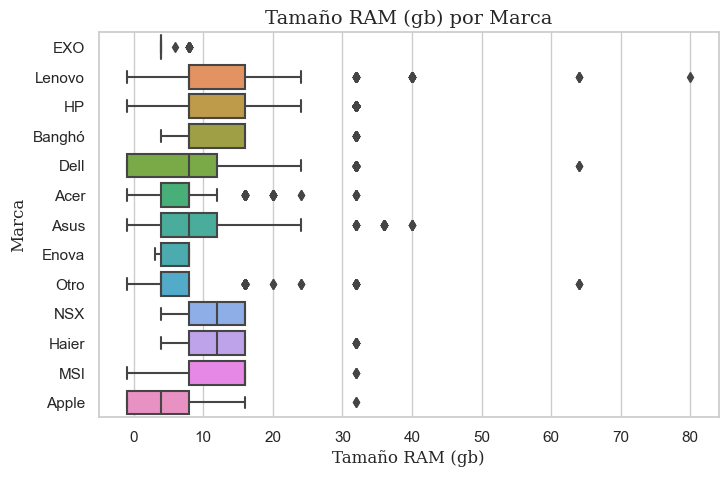

In [30]:
sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(8,5))

ax = sns.boxplot(x="Capacidad RAM", data=df, y = "Marca")
ax.set_title("Tamaño RAM (gb) por Marca", size=14, family='serif') 
plt.xlabel('Tamaño RAM (gb)', size=12, family='serif')  
plt.ylabel('Marca', size=12, family='serif')  
plt.show()

### Peso

In [31]:
df = separar_valor_um(df = df,
                    colname = "Peso", 
                    res_val = 'Valor_Peso', 
                    res_um = 'Medida_Peso',
                    cambio = {"g" : 1000,
                              "lb" : 2.205},
                    new_um = "kg")

In [32]:
c_peso_ok = (df["Valor_Peso"] < 5) & (df["Valor_Peso"] > 0)
df.loc[~c_peso_ok, "Valor_Peso"] = np.NaN
df.loc[~c_peso_ok, "Medida_Peso"] = np.NaN

<Figure size 800x400 with 0 Axes>

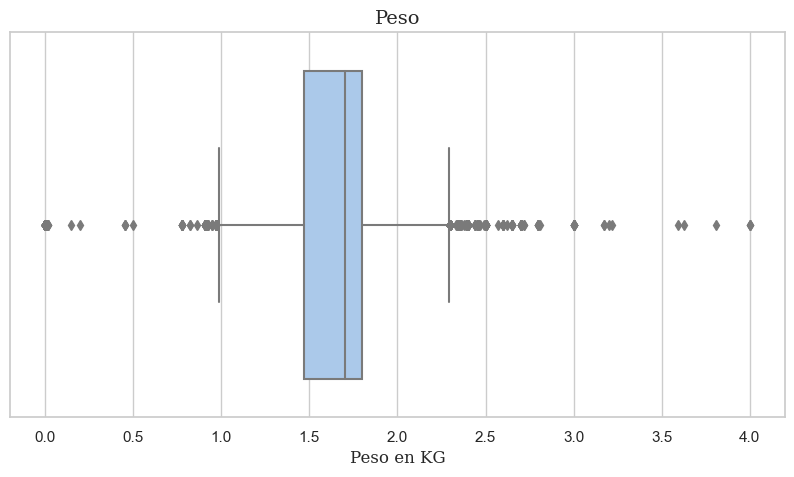

In [33]:
sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(8,4))

plt.figure(figsize=(10,5))
ax = sns.boxplot(x="Valor_Peso", data=df)
ax.set_title("Peso", size=14, family='serif') 
plt.xlabel('Peso en KG', size=12, family='serif')  
plt.show()

### Tamaño de la pantalla


In [34]:
df["Tamaño de la pantalla"].value_counts().to_frame().head()

,Tamaño de la pantalla
"15.6 """,5164
"14 """,3565
15.6 in,540
14 in,511
13.3 in,484


In [35]:
df["Tamaño de la pantalla"] = df["Tamaño de la pantalla"].str.replace('"', "pulgadas")
df["Tamaño de la pantalla"] = df["Tamaño de la pantalla"].str.replace('in', "pulgadas")


In [36]:
df = separar_valor_um(df = df,
                    colname = "Tamaño de la pantalla", 
                    res_val = 'Valor_Screen', 
                    res_um = 'Medida_Screen',
                    cambio = {"cm" : 2.54,
                              "mm" : 25.4},
                    new_um = "pulgadas")

In [37]:
df = df[df.Valor_Screen > 8]

<Figure size 800x400 with 0 Axes>

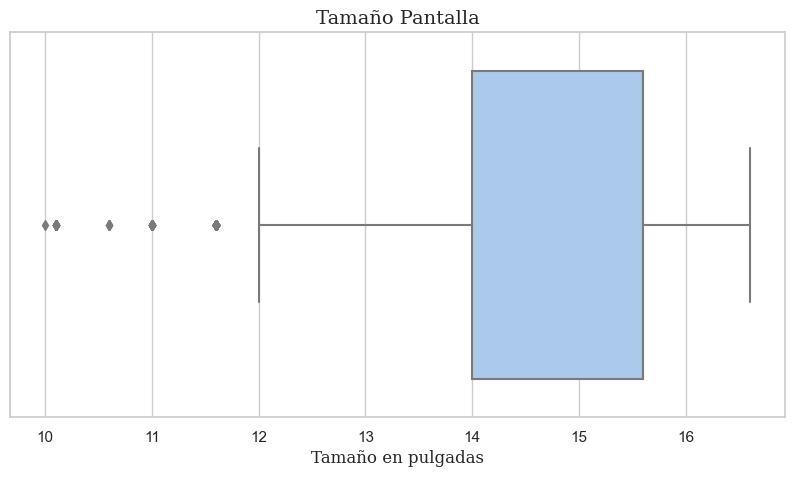

In [38]:
sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(8,4))

plt.figure(figsize=(10,5))
ax = sns.boxplot(x="Valor_Screen", data=df)
ax.set_title("Tamaño Pantalla", size=14, family='serif') 
plt.xlabel("Tamaño en pulgadas", size=12, family='serif')  
plt.show()

### Cuotas

In [39]:
df.installment.value_counts()

yes            7843
no_interest    3678
Name: installment, dtype: int64

In [40]:
df.groupby("installment").size().reset_index(name="total")

,installment,total
0,no_interest,3678
1,yes,7843


<Figure size 800x400 with 0 Axes>

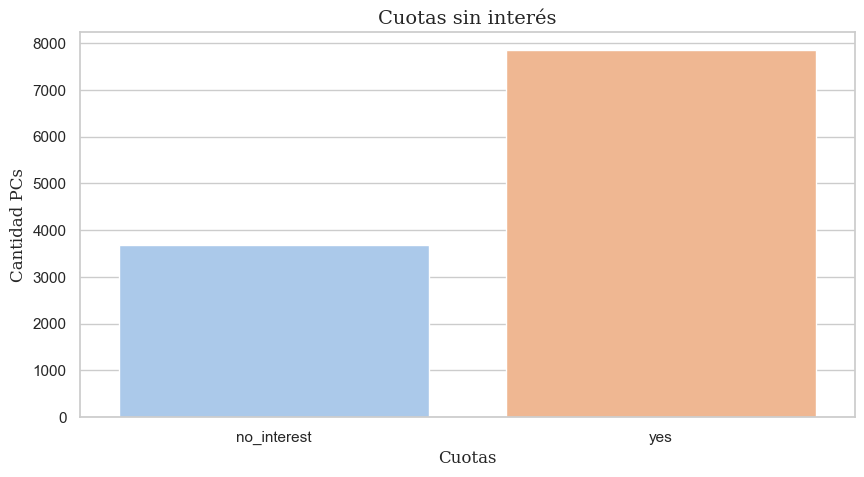

In [41]:
sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(8,4))

plt.figure(figsize=(10,5))
ax = sns.barplot(x="installment", y = "total", data=df.groupby("installment").size().reset_index(name="total"))
ax.set_title("Cuotas sin interés", size=14, family='serif') 
plt.xlabel("Cuotas", size=12, family='serif')  
plt.ylabel("Cantidad PCs", size=12, family='serif')  
plt.show()

### Cantidad de nucleos

In [42]:
df = df[df["Cantidad de núcleos"]<50]

<Figure size 800x400 with 0 Axes>

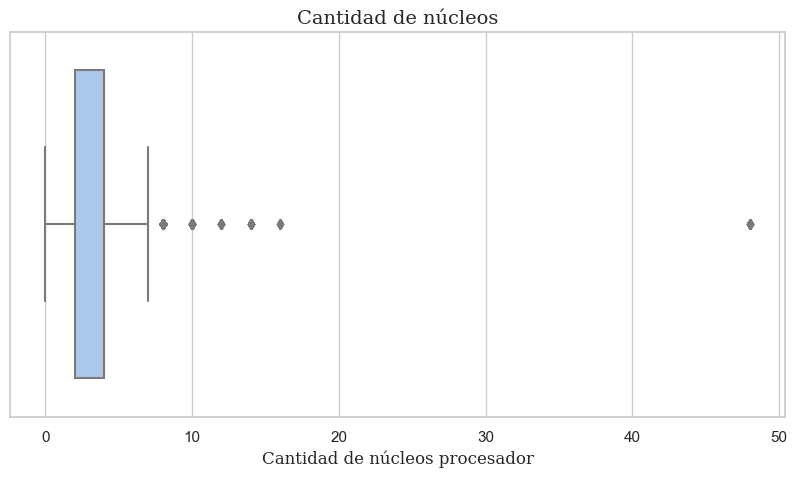

In [43]:
sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(8,4))

plt.figure(figsize=(10,5))
ax = sns.boxplot(x="Cantidad de núcleos", data=df[df["Cantidad de núcleos"]<50])
ax.set_title("Cantidad de núcleos", size=14, family='serif') 
plt.xlabel("Cantidad de núcleos procesador", size=12, family='serif')  
plt.show()

In [44]:
df["Cantidad de núcleos"].describe()

count   8509.00000
mean       3.73969
std        2.41689
min        0.00000
25%        2.00000
50%        4.00000
75%        4.00000
max       48.00000
Name: Cantidad de núcleos, dtype: float64

### Tarjeta Gráfica

In [45]:
df["Tarjeta gráfica"].isna().sum()

1032

In [46]:
df["Tarjeta gráfica"] = df["Tarjeta gráfica"].str.lower()

In [47]:
lista_dedi = ["nvidia geforce gtx 1650", "gráficos amd radeon™"]

c_nvidia = df["Tarjeta gráfica"].str.contains("nvidia", na = False)
c_dedi = df["Tarjeta gráfica"].isin(lista_dedi)

df["tipo_tarjeta_gráfica"] = "integrada"
df.loc[(c_nvidia | c_dedi), "tipo_tarjeta_gráfica"] = "dedicada"



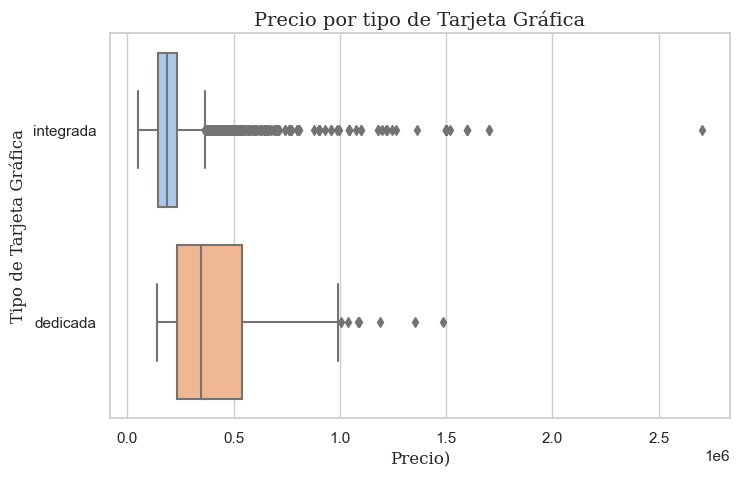

In [48]:
sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(8,5))

ax = sns.boxplot(x="price", data=df, y = "tipo_tarjeta_gráfica")
ax.set_title("Precio por tipo de Tarjeta Gráfica", size=14, family='serif') 
plt.xlabel('Precio)', size=12, family='serif')  
plt.ylabel('Tipo de Tarjeta Gráfica', size=12, family='serif')  
plt.show()

<Figure size 800x400 with 0 Axes>

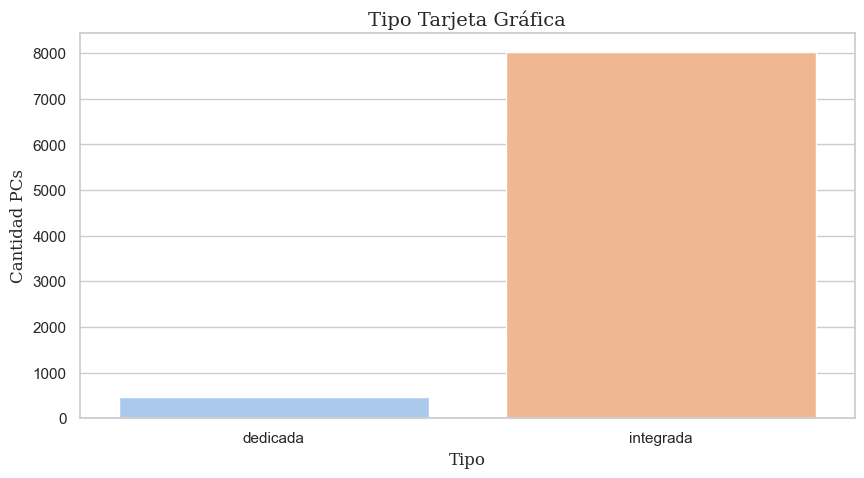

In [49]:
sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(8,4))

plt.figure(figsize=(10,5))
ax = sns.barplot(x="tipo_tarjeta_gráfica", y = "total", data=df.groupby("tipo_tarjeta_gráfica").size().reset_index(name="total"))
ax.set_title("Tipo Tarjeta Gráfica", size=14, family='serif') 
plt.xlabel("Tipo", size=12, family='serif')  
plt.ylabel("Cantidad PCs", size=12, family='serif')  
plt.show()

### Gamer

In [50]:
df["Es gamer"].value_counts()

No    5881
Sí    1997
Name: Es gamer, dtype: int64

<Figure size 800x400 with 0 Axes>

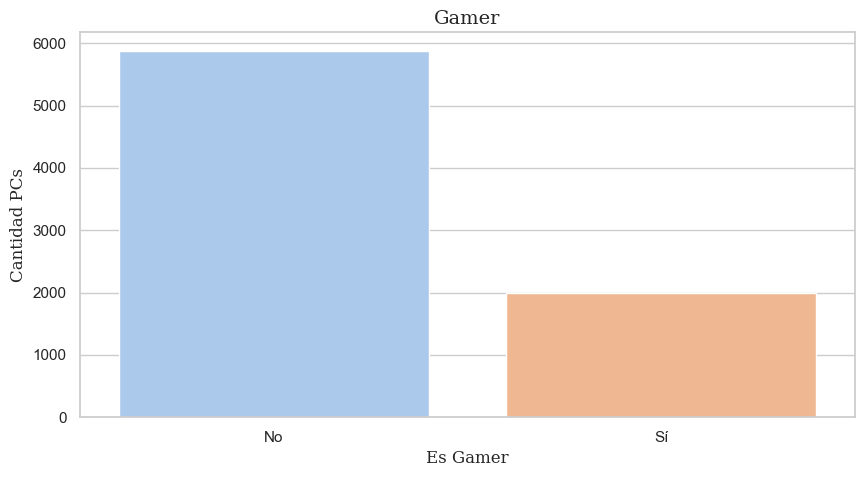

In [51]:
sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(8,4))

plt.figure(figsize=(10,5))
ax = sns.barplot(x="Es gamer", y = "total", data=df.groupby("Es gamer").size().reset_index(name="total"))
ax.set_title("Gamer", size=14, family='serif') 
plt.xlabel("Es Gamer", size=12, family='serif')  
plt.ylabel("Cantidad PCs", size=12, family='serif')  
plt.show()

### Es 2 en 1


In [52]:
df["Es 2 en 1"].value_counts()

No    7449
Sí     347
Name: Es 2 en 1, dtype: int64

<Figure size 800x400 with 0 Axes>

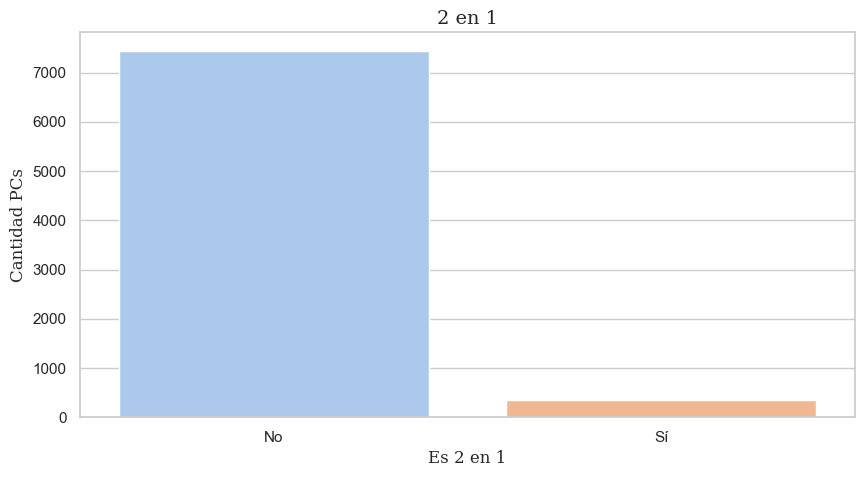

In [53]:
sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(8,4))

plt.figure(figsize=(10,5))
ax = sns.barplot(x="Es 2 en 1", y = "total", data=df.groupby("Es 2 en 1").size().reset_index(name="total"))
ax.set_title("2 en 1", size=14, family='serif') 
plt.xlabel("Es 2 en 1", size=12, family='serif')  
plt.ylabel("Cantidad PCs", size=12, family='serif')  
plt.show()

###  Es ultrabook

In [54]:
df["Es ultrabook"].value_counts()

No    5087
Sí    2610
Name: Es ultrabook, dtype: int64

<Figure size 800x400 with 0 Axes>

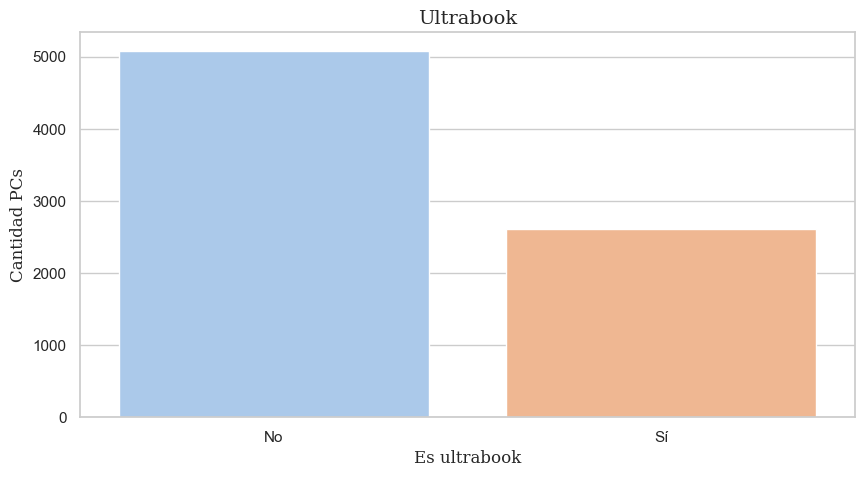

In [55]:
sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(8,4))

plt.figure(figsize=(10,5))
ax = sns.barplot(x="Es ultrabook", y = "total", data=df.groupby("Es ultrabook").size().reset_index(name="total"))
ax.set_title("Ultrabook", size=14, family='serif') 
plt.xlabel("Es ultrabook", size=12, family='serif')  
plt.ylabel("Cantidad PCs", size=12, family='serif')  
plt.show()

### Capacidad del disco Sólido

In [56]:
df = separar_valor_um(df = df,
                    colname = "Capacidad del SSD", 
                    res_val = 'Capacidad_SSD', 
                    res_um = 'Medida_SSD',
                    cambio = {"mb" : 1000,
                              "kb" : 1000000},
                    new_um = "GB")

In [57]:
df = df[df["Capacidad_SSD"] <= 4000]

<Figure size 800x400 with 0 Axes>

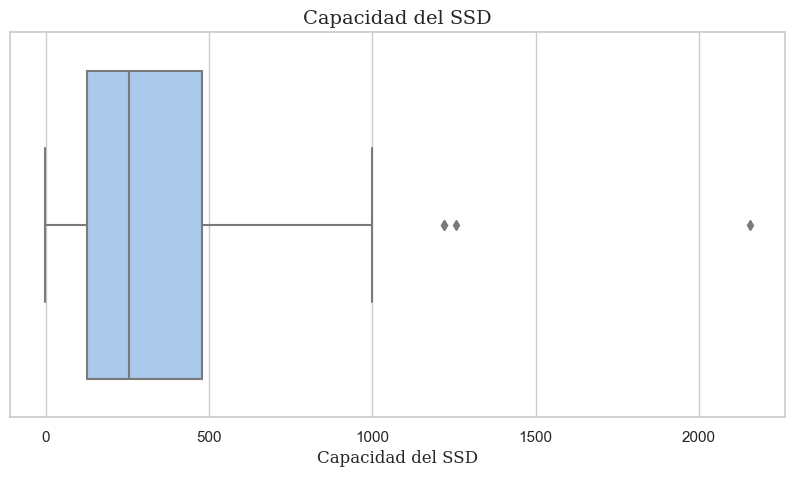

In [58]:
sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(8,4))

plt.figure(figsize=(10,5))
ax = sns.boxplot(x="Capacidad_SSD", data=df[df["Capacidad_SSD"] <= 4000])
ax.set_title("Capacidad del SSD", size=14, family='serif') 
plt.xlabel("Capacidad del SSD", size=12, family='serif')  
plt.show()

### Es touchscreen

In [59]:
df["Con pantalla táctil"].value_counts()

No    7367
Sí     572
Name: Con pantalla táctil, dtype: int64

<Figure size 800x400 with 0 Axes>

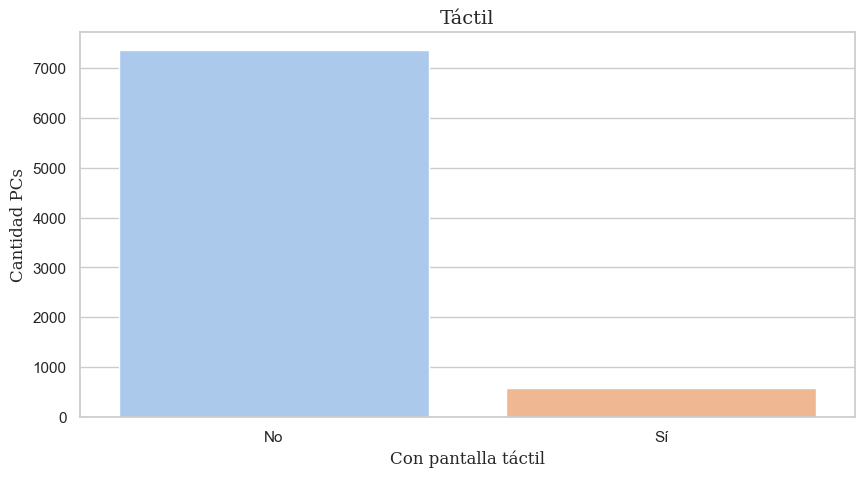

In [60]:
sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(8,4))

plt.figure(figsize=(10,5))
ax = sns.barplot(x="Con pantalla táctil", y = "total", data=df.groupby("Con pantalla táctil").size().reset_index(name="total"))
ax.set_title("Táctil", size=14, family='serif') 
plt.xlabel("Con pantalla táctil", size=12, family='serif')  
plt.ylabel("Cantidad PCs", size=12, family='serif')  
plt.show()

In [61]:
df.columns

Index(['id', 'title', 'seller_id', 'price', 'base_price', 'deal_ids',
       'initial_quantity', 'sold_quantity', 'listing_type_id',
       'available_quantity', 'sold_quantity.1', 'sale_terms', 'condition',
       'installment', 'display_size', 'shipping_cost', 'descriptions',
       'attributes', 'warnings', 'status', 'date_created', 'shipping.mode',
       'shipping.free_shipping', 'permalink', 'Tipo de batería',
       'Cantidad de núcleos', 'Profundidad', 'Resolución de la pantalla',
       'Tamaño de la pantalla', 'Tarjeta gráfica', 'Altura', 'Es 2 en 1',
       'Es gamer', 'Es ultrabook', 'Condición del ítem', 'Línea', 'Modelo',
       'Edición del sistema operativo', 'Nombre del sistema operativo',
       'Versión del sistema operativo', 'Marca del procesador', 'Memoria RAM',
       'Tipo de memoria RAM', 'Capacidad del SSD', 'Puertos USB',
       'Cantidad total de puertos USB', 'Puertos de video', 'Peso', 'Ancho',
       'Con Bluetooth', 'Con puerto ethernet', 'Con HDMI',
   

In [62]:
df = df[["id", "title", "price", "base_price", "initial_quantity", "sold_quantity", "available_quantity", "installment", 
        "shipping_cost", "date_created", "Cantidad de núcleos",  "Tarjeta gráfica", "tipo_tarjeta_gráfica", "Es 2 en 1", "Es gamer",
        "Es ultrabook", "Marca del procesador", "Con pantalla táctil",  "Marca", "linea_procesador", 'Capacidad RAM', 'Valor_Peso', 
        'Valor_Screen', 'tipo_tarjeta_gráfica', 'Capacidad_SSD', 'permalink']]

### Manejo de nulos

In [63]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8507 entries, 0 to 11526
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    8507 non-null   object 
 1   title                 8507 non-null   object 
 2   price                 8507 non-null   float64
 3   base_price            8507 non-null   float64
 4   initial_quantity      8507 non-null   int64  
 5   sold_quantity         8507 non-null   int64  
 6   available_quantity    8507 non-null   int64  
 7   installment           8507 non-null   object 
 8   shipping_cost         8507 non-null   object 
 9   date_created          8507 non-null   object 
 10  Cantidad de núcleos   8507 non-null   float64
 11  Tarjeta gráfica       7475 non-null   object 
 12  tipo_tarjeta_gráfica  8507 non-null   object 
 13  Es 2 en 1             7794 non-null   object 
 14  Es gamer              7876 non-null   object 
 15  Es ultrabook        

In [64]:
df["nulls"] = len(df.columns) - df.apply(lambda x: x.count(), axis=1)

In [65]:
df.nulls.describe()

count   8507.00000
mean       0.48889
std        1.05178
min        0.00000
25%        0.00000
50%        0.00000
75%        1.00000
max        6.00000
Name: nulls, dtype: float64

<Figure size 800x400 with 0 Axes>

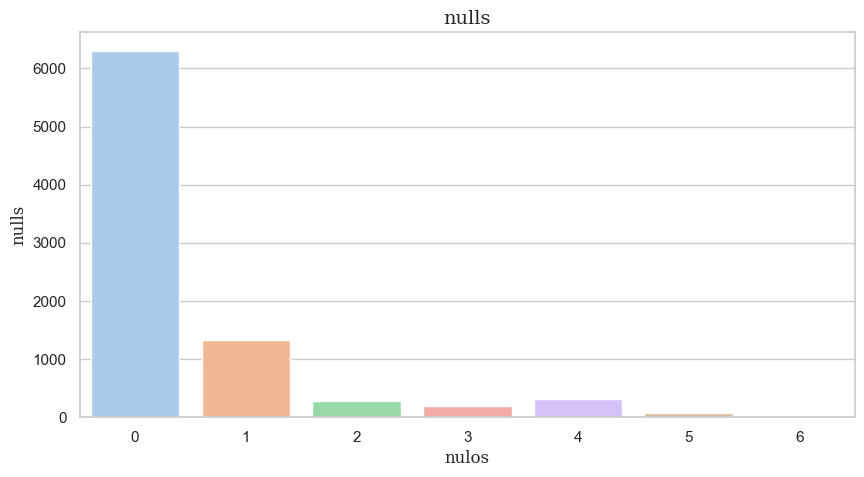

In [66]:
sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(8,4))

plt.figure(figsize=(10,5))
ax = sns.barplot(x="nulls", y = "total", data=df.groupby("nulls").size().reset_index(name="total"))
ax.set_title("nulls", size=14, family='serif') 
plt.xlabel("nulos", size=12, family='serif')  
plt.ylabel("nulls", size=12, family='serif')  
plt.show()

### Filtramos aquellas filas que tengan mas de 2 nulos

In [67]:
df.shape

(8507, 27)

In [68]:
df = df[df["nulls"] <3]

In [69]:
df.shape

(7917, 27)

### Normalizamos nombres de variables

In [70]:
import janitor

In [71]:
df = df.clean_names()

In [72]:
df = df[df["capacidad_ram"]>0]
df = df[df["valor_peso"]>0]
df = df[df["valor_screen"]>0]	
df = df[df["capacidad_ssd"]>0]	

### Imputación de nulos

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7082 entries, 0 to 11523
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    7082 non-null   object 
 1   title                 7082 non-null   object 
 2   price                 7082 non-null   float64
 3   base_price            7082 non-null   float64
 4   initial_quantity      7082 non-null   int64  
 5   sold_quantity         7082 non-null   int64  
 6   available_quantity    7082 non-null   int64  
 7   installment           7082 non-null   object 
 8   shipping_cost         7082 non-null   object 
 9   date_created          7082 non-null   object 
 10  cantidad_de_nucleos   7082 non-null   float64
 11  tarjeta_grafica       6233 non-null   object 
 12  tipo_tarjeta_grafica  7082 non-null   object 
 13  es_2_en_1             6949 non-null   object 
 14  es_gamer              7003 non-null   object 
 15  es_ultrabook        

Aquellas columnas que son categoricas (true/false) las llenamos asumiendo que lo nulo es falso.

In [74]:
c_gamer = df.es_gamer.isna()
c_ultra = df.es_ultrabook.isna()
c_21 = df.es_2_en_1.isna()
c_tacil = df.con_pantalla_tactil.isna()

df.loc[c_gamer, "es_gamer"] = "No"
df.loc[c_ultra, "es_ultrabook"] = "No"
df.loc[c_21, "es_2_en_1"] = "No"
df.loc[c_tacil, "con_pantalla_tactil"] = "No"

Las categoricas las reemplazamos por la moda y las numericas por el promedio.

In [75]:
import statistics as stat

In [76]:
c_mp = df.marca_del_procesador.isna()
c_m = df.marca.isna()
c_lp = df.linea_procesador.isna()
c_vp = df.valor_peso.isna()
c_tg = df.tarjeta_grafica.isna()


df.loc[c_mp, "marca_del_procesador"] = stat.mode(df.marca_del_procesador)
df.loc[c_m, "marca"] = stat.mode(df.marca)
df.loc[c_lp, "linea_procesador"] = stat.mode(df.linea_procesador)
df.loc[c_vp, "valor_peso"] = df.valor_peso.median()
df.loc[c_tg, "tarjeta_grafica"] = stat.mode(df.tarjeta_grafica)


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7082 entries, 0 to 11523
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    7082 non-null   object 
 1   title                 7082 non-null   object 
 2   price                 7082 non-null   float64
 3   base_price            7082 non-null   float64
 4   initial_quantity      7082 non-null   int64  
 5   sold_quantity         7082 non-null   int64  
 6   available_quantity    7082 non-null   int64  
 7   installment           7082 non-null   object 
 8   shipping_cost         7082 non-null   object 
 9   date_created          7082 non-null   object 
 10  cantidad_de_nucleos   7082 non-null   float64
 11  tarjeta_grafica       7082 non-null   object 
 12  tipo_tarjeta_grafica  7082 non-null   object 
 13  es_2_en_1             7082 non-null   object 
 14  es_gamer              7082 non-null   object 
 15  es_ultrabook        

In [78]:
del df["nulls"]

In [79]:
df._get_numeric_data().head()

,price,base_price,initial_quantity,sold_quantity,available_quantity,cantidad_de_nucleos,capacidad_ram,valor_peso,valor_screen,capacidad_ssd
0,63071.00000,63071.00000,100,5,50,2.00000,4.00000,1.35000,14.00000,64.00000
1,129999.00000,129999.00000,210,200,1,4.00000,8.00000,1.60000,14.00000,512.00000
3,151999.00000,151999.00000,369,250,1,4.00000,8.00000,1.46000,14.00000,256.00000
5,79999.00000,79999.00000,404,50,250,2.00000,4.00000,1.47000,14.00000,128.00000
8,94999.00000,94999.00000,248,150,50,2.00000,8.00000,1.60000,14.00000,128.00000


In [80]:

df["ratio_sold"] = df.sold_quantity / (df.sold_quantity + df.available_quantity )

del df["base_price"], df["sold_quantity"], df["initial_quantity"]

In [81]:
df._get_numeric_data().head()

,price,available_quantity,cantidad_de_nucleos,capacidad_ram,valor_peso,valor_screen,capacidad_ssd,ratio_sold
0,63071.00000,50,2.00000,4.00000,1.35000,14.00000,64.00000,0.09091
1,129999.00000,1,4.00000,8.00000,1.60000,14.00000,512.00000,0.99502
3,151999.00000,1,4.00000,8.00000,1.46000,14.00000,256.00000,0.99602
5,79999.00000,250,2.00000,4.00000,1.47000,14.00000,128.00000,0.16667
8,94999.00000,50,2.00000,8.00000,1.60000,14.00000,128.00000,0.75000


In [82]:
df_n = df._get_numeric_data()
columns = df_n.columns

In [83]:
import datetime as dt

anio = dt.datetime.now().year
mes = dt.datetime.now().month
dia = dt.datetime.now().day
hora = dt.datetime.now().hour
minuto = dt.datetime.now().minute

In [84]:
df_installment = df.groupby(["id", "installment"]).size().reset_index(name = "q").sort_values(by = "q", ascending = False)
df_installment.head()
df_installment[["id", "installment"]].to_csv(path / f"installments_{anio*10000+mes*100+dia}_{hora}.{minuto}.csv",
index = False, sep = ";")
del df["installment"]

df = df.drop_duplicates()

In [85]:
df.to_csv(path /f"datos_laptops_transformed_cleaned_{anio*10000+mes*100+dia}_{hora}.{minuto}.csv", 
index = False, sep = ";")

## K Means

In [86]:
from sklearn.cluster import KMeans
import numpy as np

In [87]:
normalized_df=(df_n-df_n.mean())/df.std()


C:\Users\marti\AppData\Local\Temp\ipykernel_3392\2328738380.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  normalized_df=(df_n-df_n.mean())/df.std()


In [88]:
normalized_df.head()

,price,available_quantity,cantidad_de_nucleos,capacidad_ram,valor_peso,valor_screen,capacidad_ssd,ratio_sold
0,-1.17675,-0.29494,-0.72272,-0.98095,-1.04339,-1.06824,-1.23539,-0.28556
1,-0.67305,-0.32117,0.07082,-0.47455,-0.20390,-1.06824,1.17837,2.54577
3,-0.50748,-0.32117,0.07082,-0.47455,-0.67402,-1.06824,-0.20092,2.54887
5,-1.04935,-0.18787,-0.72272,-0.98095,-0.64044,-1.06824,-0.89057,-0.04832
8,-0.93646,-0.29494,-0.72272,-0.47455,-0.20390,-1.06824,-0.89057,1.77845


In [89]:
normalized_df.describe()

,price,available_quantity,cantidad_de_nucleos,capacidad_ram,valor_peso,valor_screen,capacidad_ssd,ratio_sold
count,7082.00000,7082.00000,7082.00000,7082.00000,7082.00000,7082.00000,7082.00000,7082.00000
mean,0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000
std,0.92208,0.98878,0.99900,0.97260,0.98249,1.00399,0.98709,1.00475
min,-1.26760,-0.32117,-1.51625,-1.23415,-5.57325,-5.56550,-1.57746,-0.57026
25%,-0.49431,-0.32117,-0.72272,-0.47455,-0.59846,-1.06824,-0.28713,-0.57026
50%,-0.16340,-0.32117,0.07082,-0.47455,0.13189,0.77678,-0.20092,-0.57026
75%,0.19084,-0.29494,0.07082,0.53826,0.46768,0.77678,1.00596,0.47361
max,18.68381,26.44437,17.52854,8.64069,6.47839,1.92993,10.03601,2.55510


In [90]:
normalized_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7082 entries, 0 to 11523
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                7082 non-null   float64
 1   available_quantity   7082 non-null   float64
 2   cantidad_de_nucleos  7082 non-null   float64
 3   capacidad_ram        7082 non-null   float64
 4   valor_peso           7082 non-null   float64
 5   valor_screen         7082 non-null   float64
 6   capacidad_ssd        7082 non-null   float64
 7   ratio_sold           7082 non-null   float64
dtypes: float64(8)
memory usage: 498.0 KB


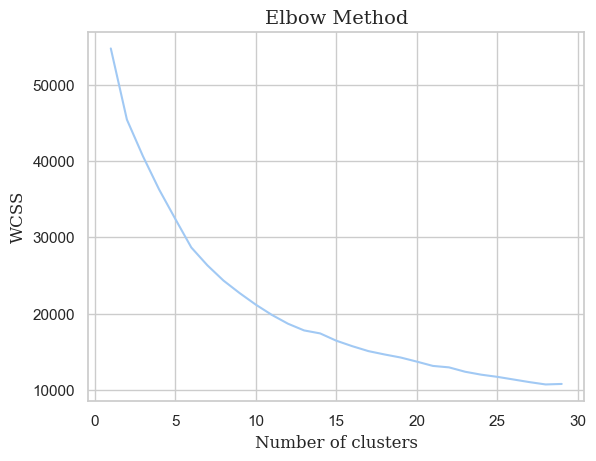

In [91]:
wcss = []
limit = 30
for i in range(1, limit):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=10, random_state=17)
    kmeans.fit(normalized_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, limit), wcss)
plt.title('Elbow Method', size=14, family='serif')
plt.xlabel('Number of clusters', size=12, family='serif')  
plt.ylabel('WCSS', size=12, family='serif')  
plt.show()

In [92]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(normalized_df)

df_n["grupo"] = pred_y

<Figure size 800x400 with 0 Axes>

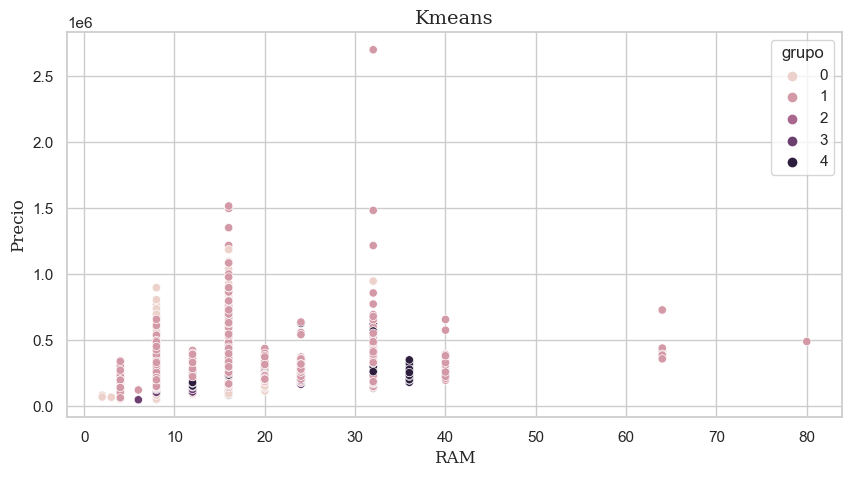

In [93]:
#sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(8,4))

plt.figure(figsize=(10,5))
ax = sns.scatterplot(x="capacidad_ram", y = "price", hue = "grupo", data=df_n)
ax.set_title("Kmeans", size=14, family='serif') 
plt.xlabel("RAM", size=12, family='serif')  
plt.ylabel("Precio", size=12, family='serif')  
plt.show()

In [94]:
df_n["grupo"] = df_n["grupo"].astype(str)

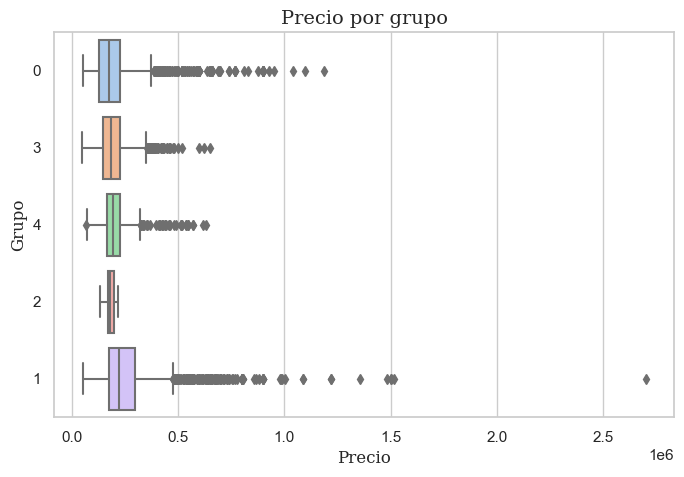

In [95]:
sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(8,5))

ax = sns.boxplot(x="price", data=df_n, y = "grupo")
ax.set_title("Precio por grupo", size=14, family='serif') 
plt.xlabel('Precio', size=12, family='serif')  
plt.ylabel('Grupo', size=12, family='serif')  
plt.show()

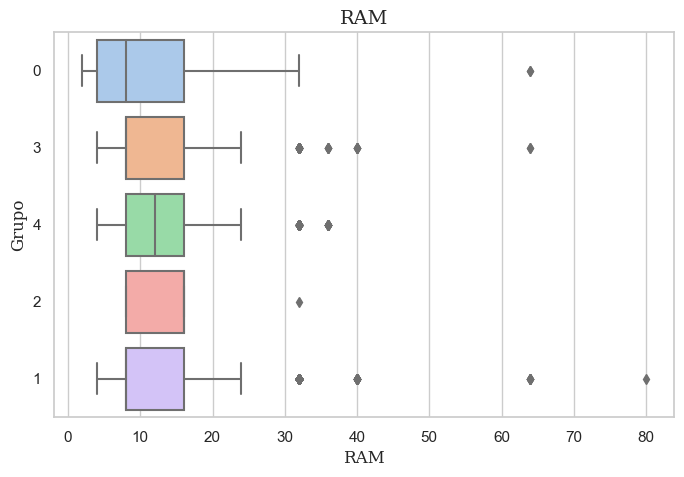

In [96]:
sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(8,5))

ax = sns.boxplot(x="capacidad_ram", data=df_n, y = "grupo")
ax.set_title("RAM", size=14, family='serif') 
plt.xlabel('RAM', size=12, family='serif')  
plt.ylabel('Grupo', size=12, family='serif')  
plt.show()

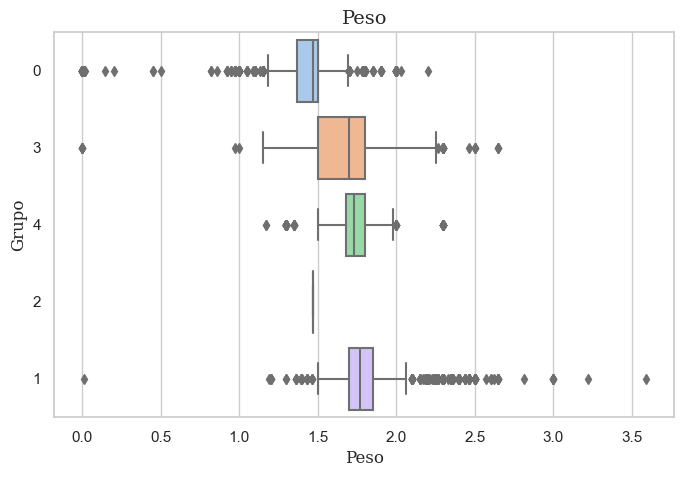

In [97]:
sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(8,5))

ax = sns.boxplot(x="valor_peso", data=df_n, y = "grupo")
ax.set_title("Peso", size=14, family='serif') 
plt.xlabel('Peso', size=12, family='serif')  
plt.ylabel('Grupo', size=12, family='serif')  
plt.show()

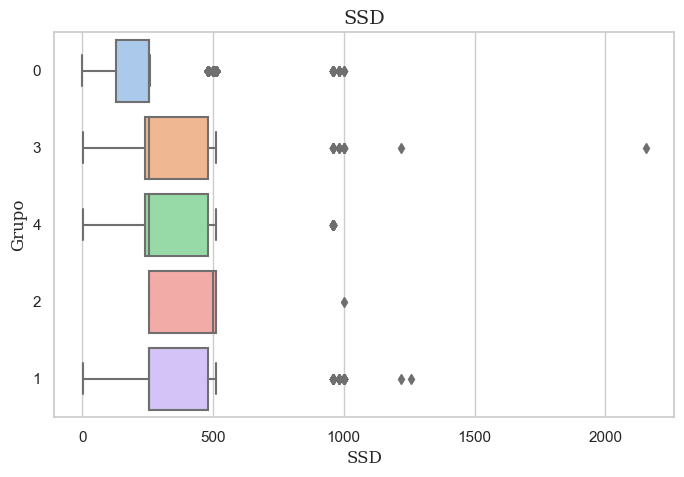

In [98]:
sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(8,5))

ax = sns.boxplot(x="capacidad_ssd", data=df_n, y = "grupo")
ax.set_title("SSD", size=14, family='serif') 
plt.xlabel('SSD', size=12, family='serif')  
plt.ylabel('Grupo', size=12, family='serif')  
plt.show()

## DBSCAN

In [99]:
from sklearn.neighbors import NearestNeighbors # importing the library
neighb = NearestNeighbors(n_neighbors=2) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(normalized_df) # fitting the data to the object
distances,indices=nbrs.kneighbors(normalized_df)

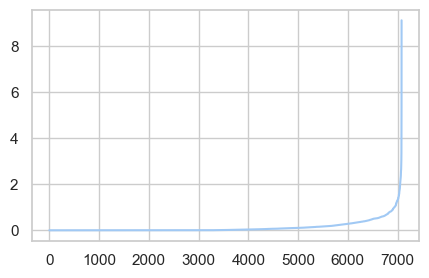

In [100]:
# Sort and plot the distances results
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances) # plotting the distances
plt.show()

In [101]:
from sklearn.cluster import DBSCAN


In [102]:

epsilon = 2
min_samples = 50

In [103]:
# Compute DBSCAN
db = DBSCAN(eps=epsilon, min_samples=min_samples).fit(normalized_df)
labels = db.labels_

no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

Estimated no. of clusters: 3
Estimated no. of noise points: 376


In [104]:
df_n["grupo_dbscan"] = labels

<Figure size 800x400 with 0 Axes>

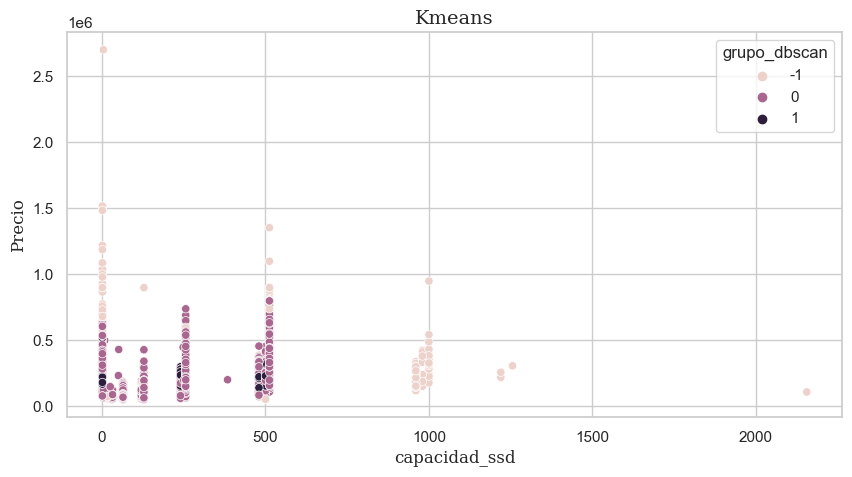

In [105]:
#sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(8,4))

plt.figure(figsize=(10,5))
ax = sns.scatterplot(x="capacidad_ssd", y = "price", hue = "grupo_dbscan", data=df_n)
ax.set_title("Kmeans", size=14, family='serif') 
plt.xlabel("capacidad_ssd", size=12, family='serif')  
plt.ylabel("Precio", size=12, family='serif')  
plt.show()

In [106]:

df_n["grupo_dbscan"] = df_n["grupo_dbscan"].astype(str)


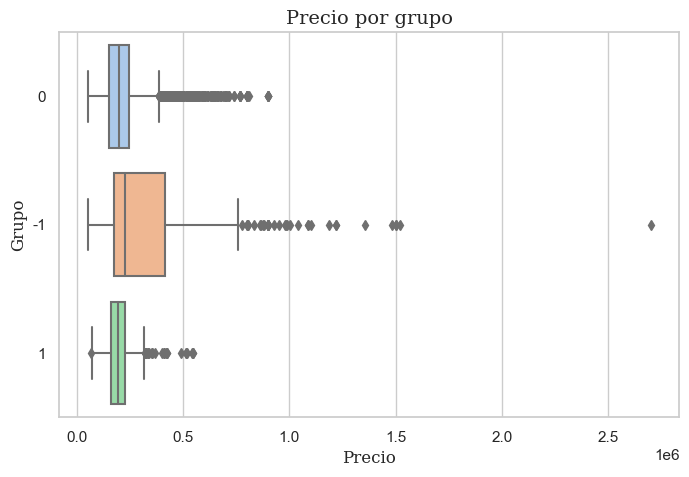

In [107]:
sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(8,5))

ax = sns.boxplot(x="price", data=df_n, y = "grupo_dbscan")
ax.set_title("Precio por grupo", size=14, family='serif') 
plt.xlabel('Precio', size=12, family='serif')  
plt.ylabel('Grupo', size=12, family='serif')  
plt.show()

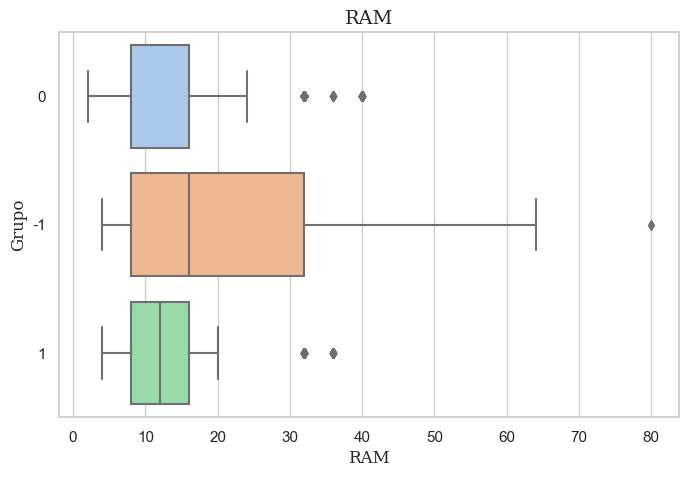

In [108]:
sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(8,5))

ax = sns.boxplot(x="capacidad_ram", data=df_n, y = "grupo_dbscan")
ax.set_title("RAM", size=14, family='serif') 
plt.xlabel('RAM', size=12, family='serif')  
plt.ylabel('Grupo', size=12, family='serif')  
plt.show()

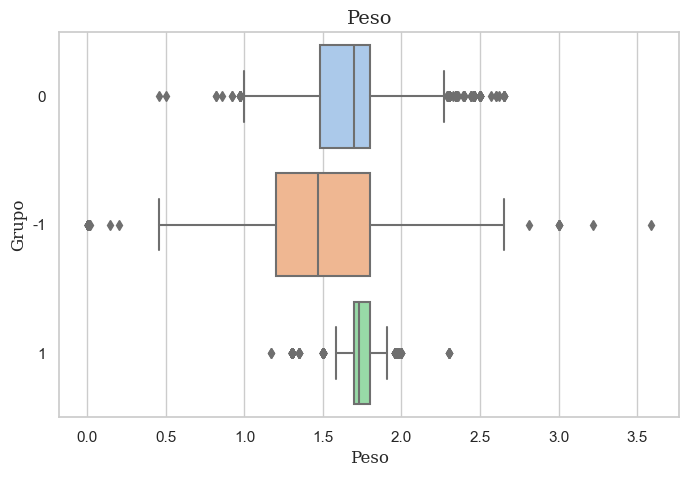

In [109]:
sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(8,5))

ax = sns.boxplot(x="valor_peso", data=df_n, y = "grupo_dbscan")
ax.set_title("Peso", size=14, family='serif') 
plt.xlabel('Peso', size=12, family='serif')  
plt.ylabel('Grupo', size=12, family='serif')  
plt.show()

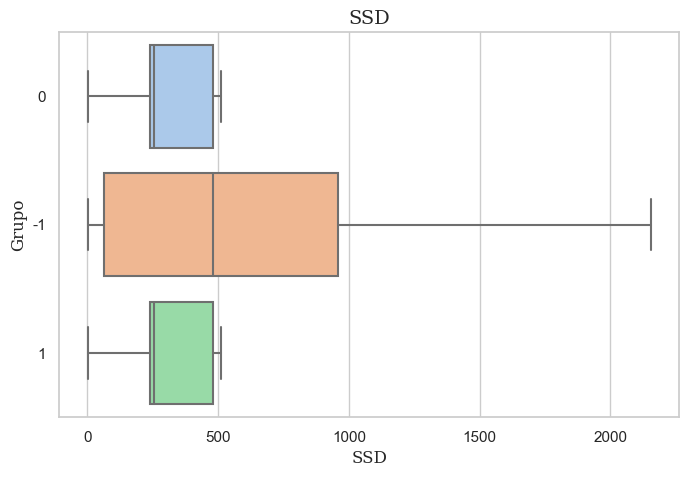

In [110]:
sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(8,5))

ax = sns.boxplot(x="capacidad_ssd", data=df_n, y = "grupo_dbscan")
ax.set_title("SSD", size=14, family='serif') 
plt.xlabel('SSD', size=12, family='serif')  
plt.ylabel('Grupo', size=12, family='serif')  
plt.show()

#### Guardamos un df con las facilidades de pago disponibles, y borramos la columna que indica las cuotas
Esto lo hacemos para quedarnos solamente con datos pertinentes a la notebook y no inherentes a la publicación.

In [111]:
df.head()

,id,title,price,available_quantity,shipping_cost,date_created,cantidad_de_nucleos,tarjeta_grafica,tipo_tarjeta_grafica,es_2_en_1,es_gamer,es_ultrabook,marca_del_procesador,con_pantalla_tactil,marca,linea_procesador,capacidad_ram,valor_peso,valor_screen,tipo_tarjeta_grafica,capacidad_ssd,permalink,ratio_sold
0,MLA1157214207,"Notebook Exo Smart T33 Gris 14 , Intel Celeron...",63071.00000,50,free,2022-08-24T19:11:55.000Z,2.00000,intel uhd graphics 600,integrada,No,No,No,Intel,No,EXO,Celeron,4.00000,1.35000,14.00000,integrada,64.00000,https://articulo.mercadolibre.com.ar/MLA-11572...,0.09091
1,MLA930347589,Notebook Lenovo Ideapad 14iil05 Platinum Gray...,129999.00000,1,free,2021-07-21T18:17:49.000Z,4.00000,intel uhd graphics g1,integrada,No,Sí,Sí,Intel,No,Lenovo,Core i5,8.00000,1.60000,14.00000,integrada,512.00000,https://articulo.mercadolibre.com.ar/MLA-93034...,0.99502
3,MLA1138721902,"Notebook Hp 14-dq2029la Plata Natural 14 , Int...",151999.00000,1,free,2022-05-24T18:58:45.000Z,4.00000,intel iris xe graphics g7 80eus,integrada,No,No,No,Intel,No,HP,Core i5,8.00000,1.46000,14.00000,integrada,256.00000,https://articulo.mercadolibre.com.ar/MLA-11387...,0.99602
5,MLA1144765954,"Notebook Hp 14-cf2531la Negra 14 , Intel Celer...",79999.00000,250,free,2022-06-29T12:31:09.000Z,2.00000,intel uhd graphics 600,integrada,No,No,No,Intel,No,HP,Celeron,4.00000,1.47000,14.00000,integrada,128.00000,https://articulo.mercadolibre.com.ar/MLA-11447...,0.16667
8,MLA1151530200,Notebook Lenovo Ideapad 3 14iil05 Intel Core I...,94999.00000,50,free,2022-08-11T16:12:19.000Z,2.00000,intel uhd graphics,integrada,No,No,No,Intel,No,Lenovo,Core i3,8.00000,1.60000,14.00000,integrada,128.00000,https://articulo.mercadolibre.com.ar/MLA-11515...,0.75000


## Gower 

In [112]:
import gower
df_gower = gower.gower_matrix(df)

In [113]:
df_gower = pd.DataFrame(df_gower)

In [114]:
df_gower.head()

0       1       2       3       4       5       6       7       8     \
0 0.00000 0.44794 0.35453 0.22389 0.34013 0.37036 0.44698 0.24651 0.34975   
1 0.44794 0.00000 0.35509 0.44179 0.36867 0.48121 0.43771 0.45365 0.40253   
2 0.35453 0.35509 0.00000 0.30514 0.32213 0.43128 0.26937 0.36024 0.26588   
3 0.22389 0.44179 0.30514 0.00000 0.33399 0.36998 0.39735 0.24325 0.30013   
4 0.34013 0.36867 0.32213 0.33399 0.00000 0.39192 0.41216 0.34947 0.27810   

     9       10      11      12      13      14      15      16      17    \
0 0.35933 0.35800 0.34377 0.20263 0.24043 0.22861 0.38787 0.39188 0.36009   
1 0.35693 0.36415 0.40852 0.41923 0.42629 0.43672 0.32251 0.36572 0.39515   
2 0.22325 0.18306 0.31511 0.32581 0.33288 0.34331 0.28089 0.35854 0.26787   
3 0.35318 0.31128 0.33956 0.24600 0.23733 0.22719 0.38342 0.38864 0.31191   
4 0.32355 0.32827 0.26959 0.31142 0.31849 0.32891 0.36420 0.36215 0.32890   

     18      19      20      21      22      23      24      25      26    \
0 0.43493 0.22070 0.39650 0.38505 0.36114 0.22260 0.35897 0.38828 0.38669   
1 0.49160 0.40570 0.44987 0.41071 0.35532 0.45050 0.30767 0.40894 0.40907   
2 0.35584 0.35577 0.36607 0.36417 0.22804 0.35709 0.26832 0.36240 0.35914   
3 0.38530 0.22509 0.39326 0.37891 0.35790 0.22610 0.35282 0.38213 0.38482   
4 0.35760 0.29790 0.36677 0.31025 0.33142 0.34270 0.23865 0.27016 0.31978   

     27      28      29      30      31      32      33      34      35    \
0 0.25029 0.35369 0.35144 0.31490 0.34061 0.40478 0.29424 0.34767 0.21327   
1 0.41513 0.35528 0.31922 0.39408 0.37304 0.44159 0.41457 0.40514 0.40877   
2 0.32172 0.21847 0.27196 0.25727 0.36659 0.35778 0.32116 0.31261 0.31535   
3 0.29302 0.30406 0.34529 0.27187 0.33760 0.40154 0.29237 0.34465 0.25406   
4 0.31459 0.27757 0.22869 0.29621 0.31606 0.37505 0.31411 0.32239 0.31948   

     36      37      38      39      40      41      42      43      44    \
0 0.32667 0.38605 0.23599 0.34445 0.46049 0.38890 0.34454 0.52262 0.39218   
1 0.39229 0.44681 0.42969 0.40951 0.40609 0.45034 0.37727 0.49646 0.45177   
2 0.26840 0.39688 0.29304 0.31564 0.48965 0.31369 0.37081 0.48928 0.31415   
3 0.28364 0.38594 0.18601 0.34121 0.46060 0.33928 0.34182 0.51938 0.34425   
4 0.34831 0.34271 0.32188 0.22776 0.48213 0.31757 0.36377 0.49289 0.31776   

     45      46      47      48      49      50      51      52      53    \
0 0.25195 0.30356 0.44091 0.27667 0.34528 0.27450 0.44395 0.49445 0.39590   
1 0.41459 0.40525 0.18097 0.42271 0.36415 0.45076 0.44846 0.53213 0.31593   
2 0.32118 0.26957 0.36212 0.32929 0.22688 0.35831 0.40192 0.40379 0.27560   
3 0.24871 0.25400 0.43476 0.27343 0.29565 0.27502 0.43780 0.44482 0.34918   
4 0.31413 0.31845 0.36165 0.33868 0.27362 0.29947 0.36469 0.46181 0.36617   

     54      55      56      57      58      59      60      61      62    \
0 0.35302 0.24085 0.37889 0.36202 0.40086 0.41366 0.39178 0.34685 0.34456   
1 0.35651 0.42448 0.46278 0.39700 0.36364 0.31280 0.36561 0.36481 0.37725   
2 0.17542 0.28856 0.37276 0.39079 0.32331 0.40162 0.35844 0.27068 0.37080   
3 0.30364 0.19132 0.37274 0.36239 0.35341 0.41668 0.38853 0.34361 0.34181   
4 0.32063 0.32128 0.36489 0.38609 0.37040 0.44136 0.36205 0.31712 0.36375   

     63      64      65      66      67      68      69      70      71    \
0 0.53039 0.39688 0.34012 0.27579 0.39258 0.40333 0.35002 0.20764 0.38868   
1 0.49020 0.36039 0.45565 0.45068 0.40845 0.44903 0.36128 0.41422 0.40829   
2 0.48302 0.32006 0.36320 0.35726 0.35779 0.36732 0.27119 0.32080 0.36175   
3 0.52593 0.35016 0.33397 0.27880 0.38789 0.39718 0.34387 0.24834 0.38254   
4 0.49944 0.36715 0.31171 0.34739 0.31792 0.36754 0.31423 0.31376 0.31388   

     72      73      74      75      76      77      78      79      80    \
0 0.19916 0.39822 0.32508 0.38876 0.43908 0.37070 0.34892 0.39521 0.36265   
1 0.42293 0.45296 0.39523 0.40943 0.48712 0.49021 0.37359 0.44995 0.48410   
2 0.32952 0.36235 0.26690 0.36288 0.43719 0.39947 0.19250 0.31573 0.34

In [115]:
df_gower.shape

(5721, 5721)

In [116]:
df_gower.to_csv(path / f"gower_distances_{anio*10000+mes*100+dia}_{hora}.{minuto}.csv",
index = False, sep = ";")